- - -

### `EDA`

Preprocesamiento y análisis exploratorio de datos de plataformas de streaming. 

In [1]:
import os
from datetime import datetime
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'D:\Henry\Repo\PP\datasets\titles\join\platforms_titles_ratings.csv', low_memory=False)
data.head(3)

,id,type,title,director,cast,country,date_added,release_year,rating,duration_int,duration_type,listed_in,description,userId,score,score_date
0,as1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113,min,"comedy, drama",a small fishing village must procure a local d...,543,5.0,2003-07-30
1,as1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113,min,"comedy, drama",a small fishing village must procure a local d...,595,3.0,1996-08-13
2,as1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113,min,"comedy, drama",a small fishing village must procure a local d...,611,3.0,2001-01-03


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11024289 entries, 0 to 11024288
Data columns (total 16 columns):
 #   Column         Dtype  
---  ------         -----  
 0   id             object 
 1   type           object 
 2   title          object 
 3   director       object 
 4   cast           object 
 5   country        object 
 6   date_added     object 
 7   release_year   int64  
 8   rating         object 
 9   duration_int   int64  
 10  duration_type  object 
 11  listed_in      object 
 12  description    object 
 13  userId         int64  
 14  score          float64
 15  score_date     object 
dtypes: float64(1), int64(3), object(12)
memory usage: 1.3+ GB


Busca registros duplicados


In [4]:
data[data.duplicated()]

,id,type,title,director,cast,country,date_added,release_year,rating,duration_int,duration_type,listed_in,description,userId,score,score_date
1079,as3,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",united states,2021-03-30,2017,g,74,min,"action, drama, suspense",after a man discovers his wife is cheating on ...,21661,4.0,2016-11-16
1453,as4,movie,pink: staying true,sonia anderson,"interviews with: pink, adele, beyoncé, britney...",united states,2021-03-30,2014,g,69,min,documentary,"pink breaks the mold once again, bringing her ...",8659,4.0,2001-08-06
1830,as4,movie,pink: staying true,sonia anderson,"interviews with: pink, adele, beyoncé, britney...",united states,2021-03-30,2014,g,69,min,documentary,"pink breaks the mold once again, bringing her ...",109788,4.0,2003-06-08
2678,as6,movie,living with dinosaurs,paul weiland,"gregory chisholm, juliet stevenson, brian hens...",united kingdom,2021-03-30,1989,g,52,min,"fantasy, kids",the story unfolds in a an english seaside town...,71022,4.0,2017-05-03
4010,as9,movie,global meltdown,daniel gilboy,"michael paré, leanne khol young, patrick j. ma...",canada,2021-03-30,2017,g,87,min,"action, science fiction, suspense",a helicopter pilot and an environmental scient...,34060,0.5,2007-10-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11019917,ns8798,tv show,zak storm,NaN,"michael johnston, jessica gee-george, christin...","united states, france, south korea, indonesia",2018-09-13,2016,tv-y7,3,seasons,kids' tv,teen surfer zak storm is mysteriously transpor...,270123,3.5,2015-07-05
11020127,ns8799,movie,zed plus,chandra prakash dwivedi,"adil hussain, mona singh, k.k. raina, sanjay m...",india,2019-12-31,2014,tv-ma,131,min,"comedies, dramas, international movies",a philandering small-town mechanic's political...,35544,3.0,2001-07-25
11022403,ns8804,tv show,zombie dumb,NaN,NaN,NaN,2019-07-01,2018,tv-y7,2,seasons,"kids' tv, korean tv shows, tv comedies","while living alone in a spooky town, a young g...",24025,3.5,2016-03-27
11022466,ns8804,tv show,zombie dumb,NaN,NaN,NaN,2019-07-01,2018,tv-y7,2,seasons,"kids' tv, korean tv shows, tv comedies","while living alone in a spooky town, a young g...",36048,2.0,2001-08-09


Confirma visualizando un id al azar

In [5]:
data[(data.id == 'ns8799') & (data.userId == 35544)]

,id,type,title,director,cast,country,date_added,release_year,rating,duration_int,duration_type,listed_in,description,userId,score,score_date
11020126,ns8799,movie,zed plus,chandra prakash dwivedi,"adil hussain, mona singh, k.k. raina, sanjay m...",india,2019-12-31,2014,tv-ma,131,min,"comedies, dramas, international movies",a philandering small-town mechanic's political...,35544,3.0,2001-07-25
11020127,ns8799,movie,zed plus,chandra prakash dwivedi,"adil hussain, mona singh, k.k. raina, sanjay m...",india,2019-12-31,2014,tv-ma,131,min,"comedies, dramas, international movies",a philandering small-town mechanic's political...,35544,3.0,2001-07-25


In [6]:
print('La cantidad de registros duplicados es:', data.duplicated().sum())

La cantidad de registros duplicados es: 10466


Comprobando que efectivamente son duplicados, se eliminan

In [7]:
data.drop_duplicates(inplace = True)

Se visualizan los valores nulos

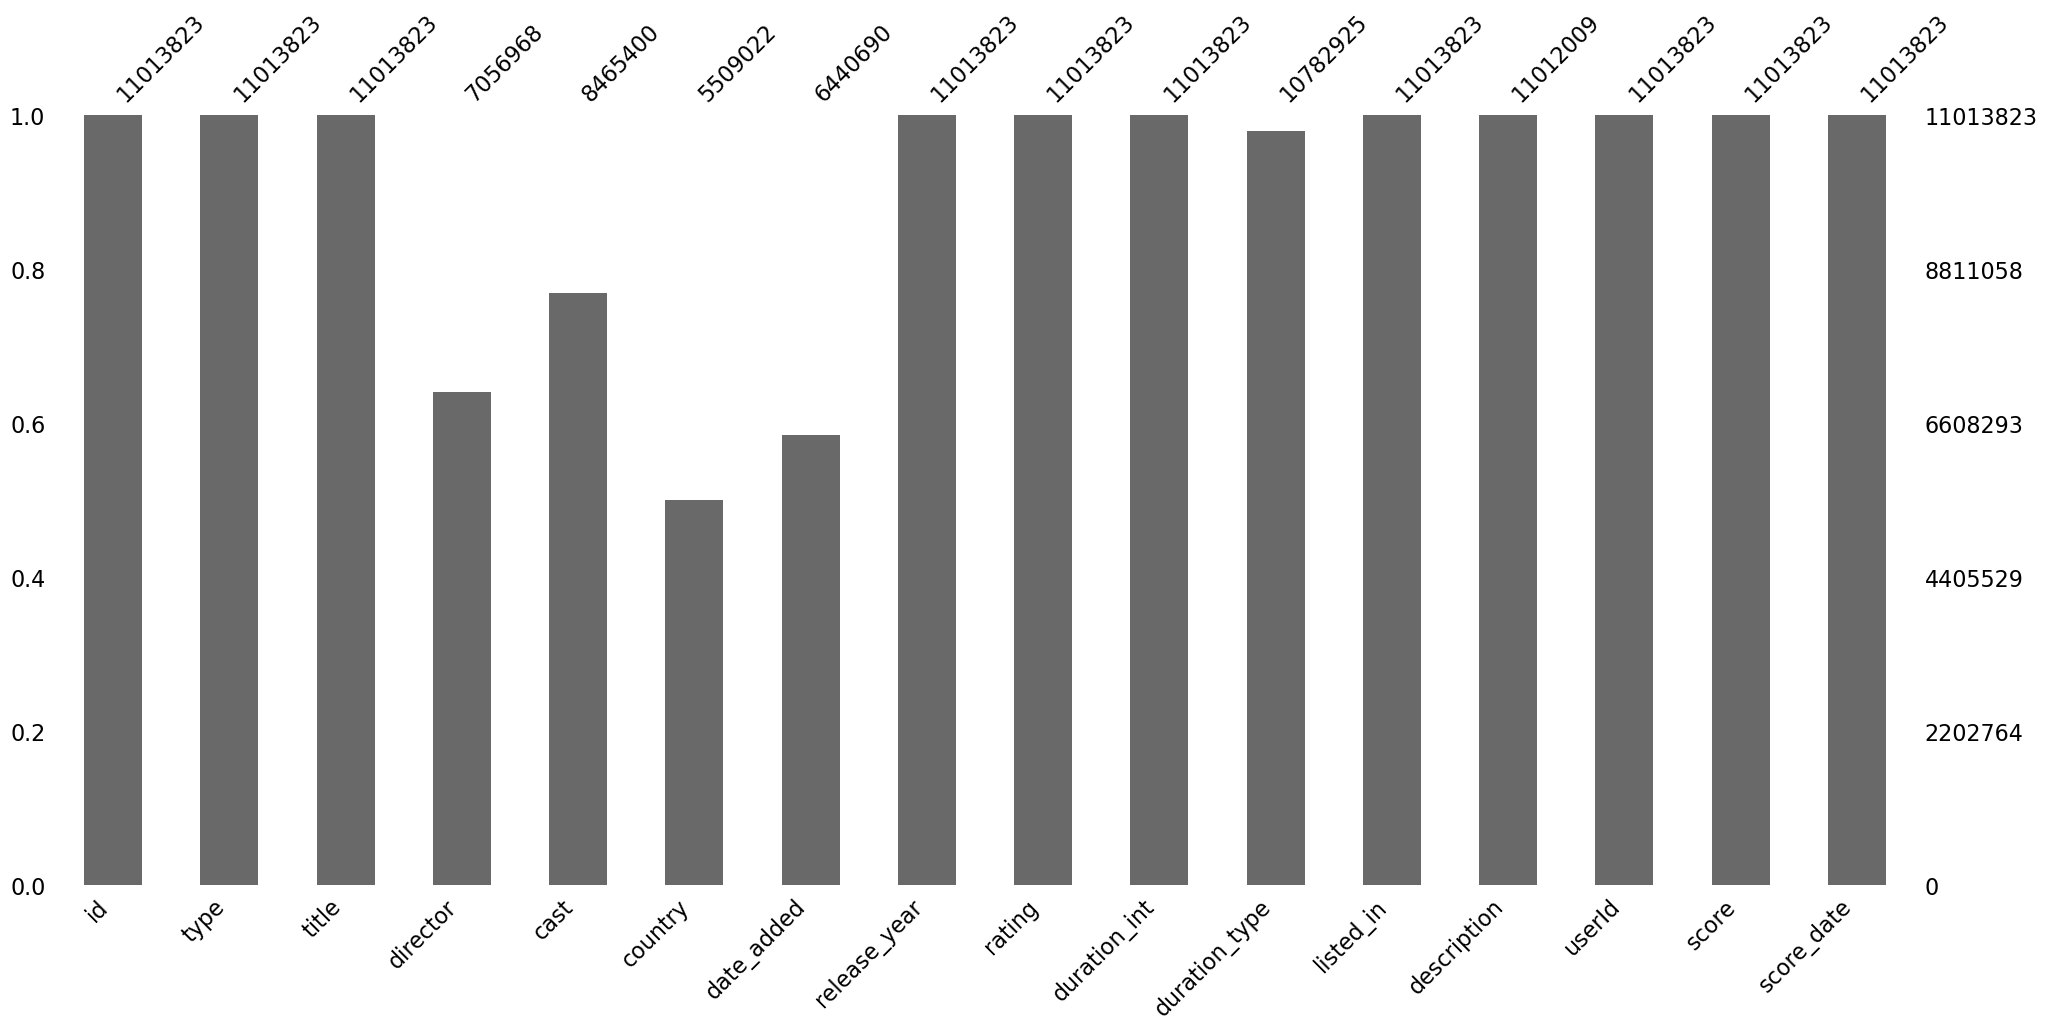

In [8]:
msno.bar(data)
plt.show()

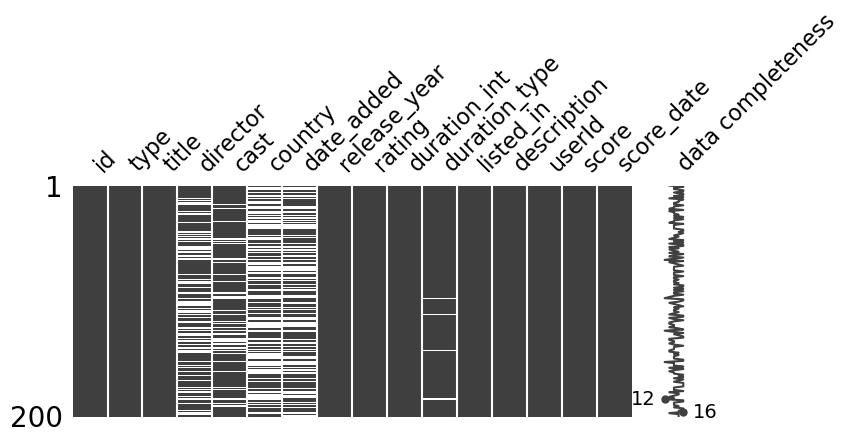

In [9]:
msno.matrix(data.sample(200), labels = True, figsize=(8,3))
plt.show()

Contabiliza los faltantes de las columnas director, cast, country y date_added.

In [10]:
print('Porcentaje de valores faltantes de la variable director:', (data.director.isnull().sum()/len(data)) * 100)
print('Porcentaje de valores faltantes de la variable cast:', (data.cast.isnull().sum()/len(data)) * 100)
print('Porcentaje de valores faltantes de la variable country:', (data.country.isnull().sum()/len(data)) * 100)
print('Porcentaje de valores faltantes de la variable date_addded:', (data.date_added.isnull().sum()/len(data)) * 100)


Porcentaje de valores faltantes de la variable director: 35.92626284261151
Porcentaje de valores faltantes de la variable cast: 23.138405256739645
Porcentaje de valores faltantes de la variable country: 49.980837716386034
Porcentaje de valores faltantes de la variable date_addded: 41.52175861188254


Elimina las columnas country y date_added.

In [11]:
data.drop(columns = ['country' , 'date_added'], inplace = True)

Contabiliza los valores de la columna duration_type.

In [12]:
print('Porcentaje de valores faltantes de la variable duration_type:', (data.duration_type.isnull().sum()/len(data)) * 100)

Porcentaje de valores faltantes de la variable duration_type: 2.0964382667126573


In [13]:
data.duration_type.value_counts()

min        7658823
season     2003923
seasons    1120179
Name: duration_type, dtype: int64

Unifica el valor seasons.

In [14]:
data.replace('season' , 'seasons' , inplace=True)

Comprueba los valores de la columna duration_type después de unificarlos.

In [15]:
data.duration_type.value_counts()

min        7658823
seasons    3124102
Name: duration_type, dtype: int64

In [16]:
data.type.value_counts()

movie      7889721
tv show    3124102
Name: type, dtype: int64

In [17]:
data[(data['duration_type'].isnull()) & (data['type'] == 'tv show')]

,id,type,title,director,cast,release_year,rating,duration_int,duration_type,listed_in,description,userId,score,score_date


In [18]:
dt_null_num = len(data[(data['duration_type'].isnull()) & (data['type'] == 'movie')])
print(f'Cantidad de nulos en duration_type con type = movie: ', dt_null_num)
dt_null_num = len(data[(data['duration_type'].isnull()) & (data['type'] == 'tv show')])
print(f'Cantidad de nulos en duration_type con type = tv show: ', dt_null_num)

Cantidad de nulos en duration_type con type = movie:  230898
Cantidad de nulos en duration_type con type = tv show:  0


Dado que todos los registros con datos faltantes en duration_type corresponden al type movie, se asigna el valor 'min'.

In [19]:
#data['duration_type'].apply(lambda x: 'min' if data['type']  == 'movie')

data.fillna({'duration_type' : 'min'}, inplace=True)

In [20]:
data[data['duration_type'].isnull()]

,id,type,title,director,cast,release_year,rating,duration_int,duration_type,listed_in,description,userId,score,score_date


Comprueba los valores de la columna duration_type después de unificarlos.

In [21]:
data.duration_type.value_counts()

min        7889721
seasons    3124102
Name: duration_type, dtype: int64

Se visualizan los valores nulos.

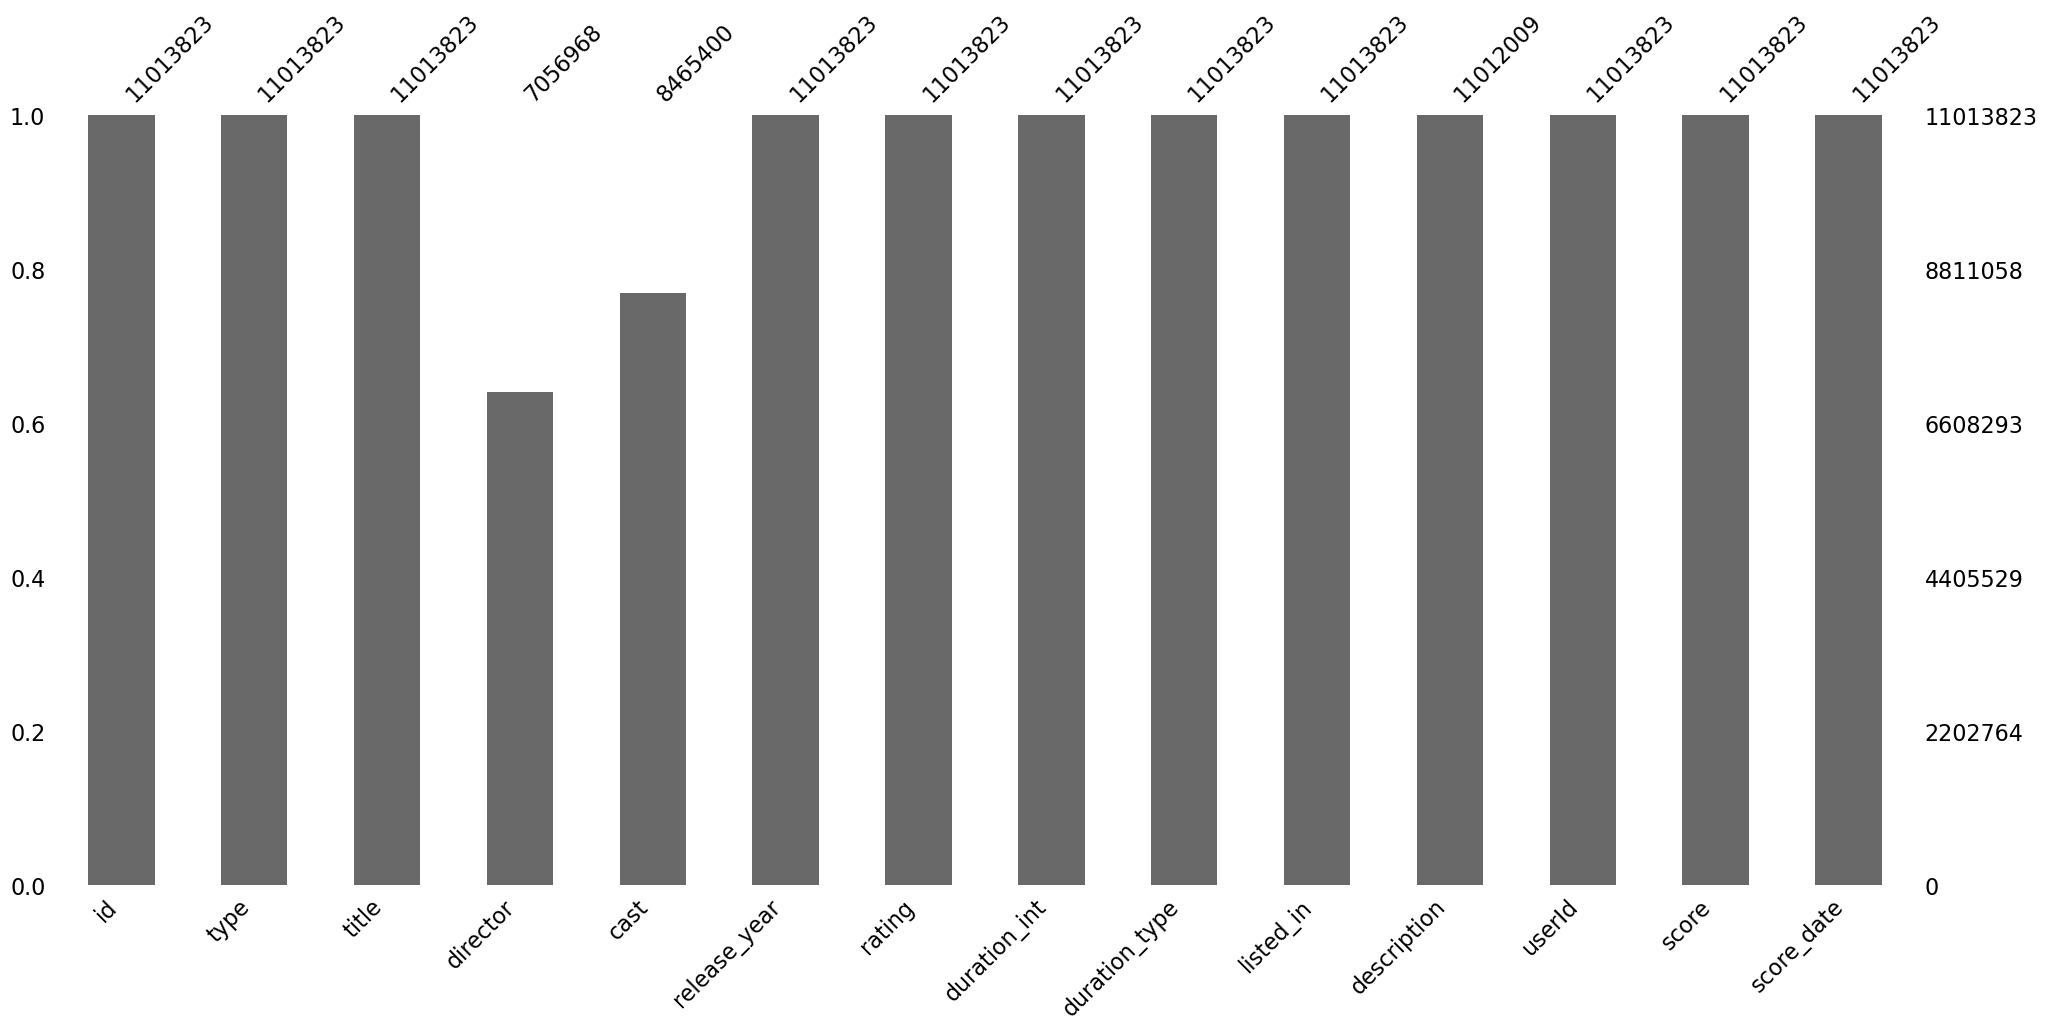

In [22]:
# Se visualizan los valores nulos
msno.bar(data)
plt.show()

Visualiza cómo se distribuye la variable score.

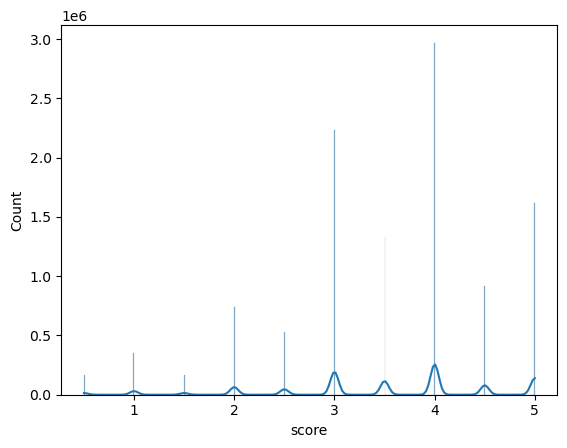

In [23]:
import seaborn as sns
sns.histplot(x = 'score', data= data, kde = True)
plt.show()

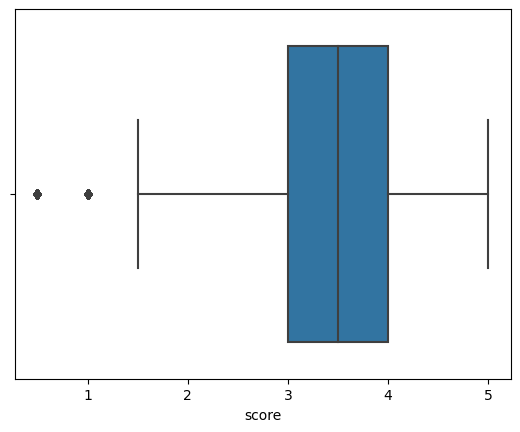

In [24]:
sns.boxplot(x = 'score', data = data)
plt.show()

Genera el nuevo archivo csv de plataformas-puntuaciones preprocesado.

In [25]:
data.to_csv(r'D:\Henry\Repo\PP\datasets\titles\join\platforms_titles_ratings_f.csv', index= False)